In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import skew, kurtosis


In [2]:
# Load the dataset
file_path = '/content/insurance.csv'
data = pd.read_csv(file_path)


In [3]:
# Convert categorical variables to numerical values
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['region'] = label_encoder.fit_transform(data['region'])


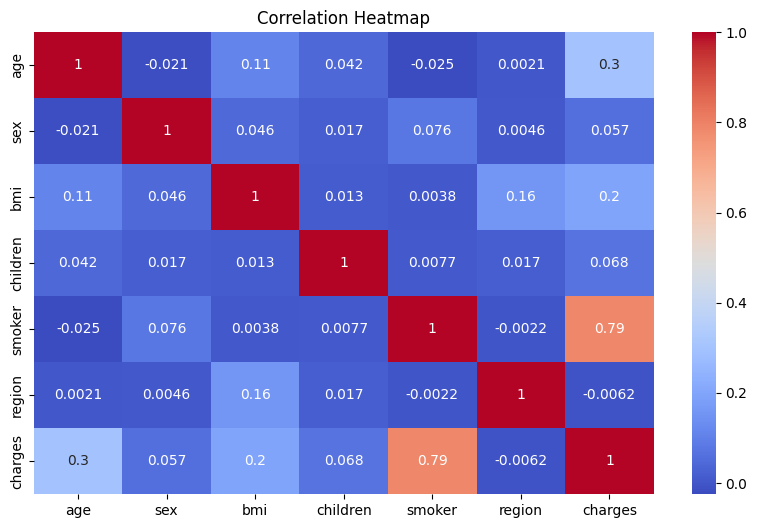

In [4]:
# Plotting heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap')
plt.show()


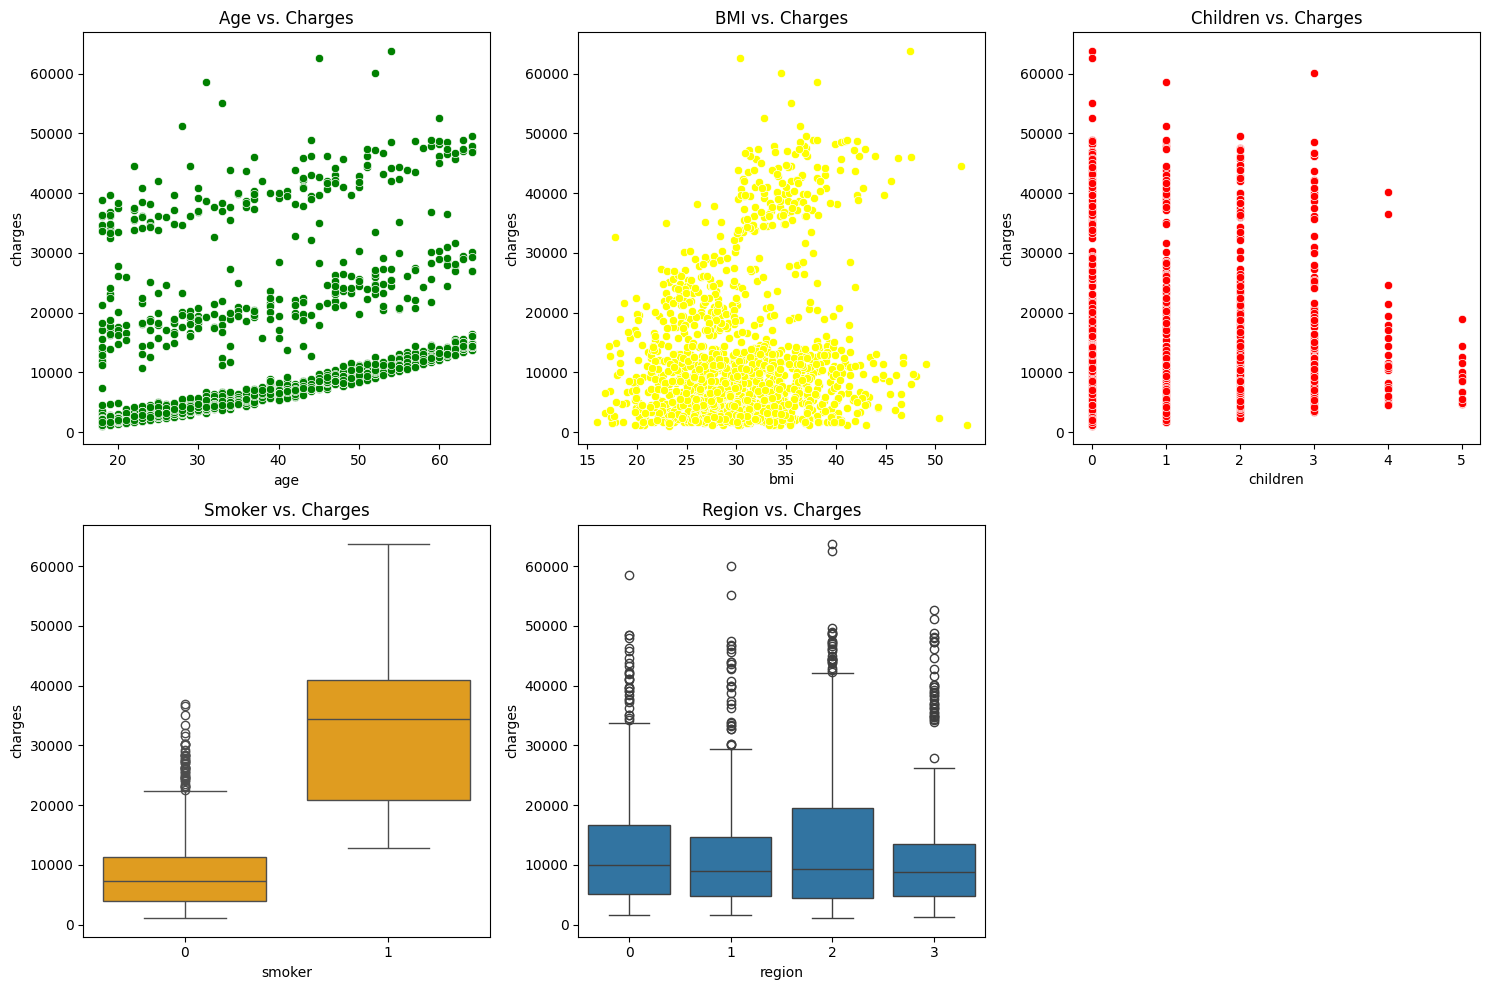

In [5]:
# Plotting relationships between features and charges
plt.figure(figsize=(15, 10))

# Age vs. Charges
plt.subplot(2, 3, 1)
sns.scatterplot(data=data, x='age', y='charges',color='green')
plt.title('Age vs. Charges')

# BMI vs. Charges
plt.subplot(2, 3, 2)
sns.scatterplot(data=data, x='bmi', y='charges',color='yellow')
plt.title('BMI vs. Charges')

# Children vs. Charges
plt.subplot(2, 3, 3)
sns.scatterplot(data=data, x='children', y='charges',color='red')
plt.title('Children vs. Charges')

# Smoker vs. Charges
plt.subplot(2, 3, 4)
sns.boxplot(data=data, x='smoker', y='charges',color='orange')
plt.title('Smoker vs. Charges')

# Region vs. Charges
plt.subplot(2, 3, 5)
sns.boxplot(data=data, x='region', y='charges')
plt.title('Region vs. Charges')

plt.tight_layout()
plt.show()

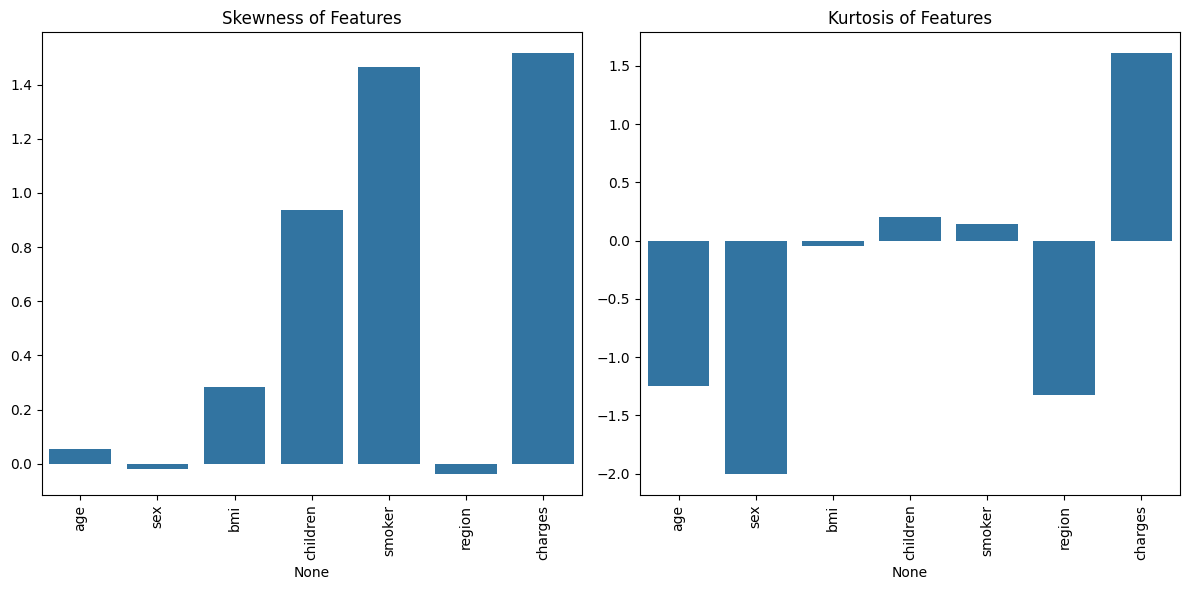

In [6]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis
skewness = data.skew()
kurtosis_values = data.kurtosis()

# Plot skewness
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=skewness.index, y=skewness.values)
plt.title('Skewness of Features')
plt.xticks(rotation=90)

# Plot kurtosis
plt.subplot(1, 2, 2)
sns.barplot(x=kurtosis_values.index, y=kurtosis_values.values)
plt.title('Kurtosis of Features')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

# Prepare data for modeling
X = data.drop(columns=['charges'])
y = data['charges']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print(f"Train RMSE: {mean_squared_error(y_train, y_pred_train, squared=False)}")
    print(f"Test RMSE: {mean_squared_error(y_test, y_pred_test, squared=False)}")
    print(f"Train R^2: {r2_score(y_train, y_pred_train)}")
    print(f"Test R^2: {r2_score(y_test, y_pred_test)}")
    print("\n")

In [9]:
# Prediction using Linear Regression
lin_reg = LinearRegression()
evaluate_model(lin_reg, X_train_scaled, X_test_scaled, y_train, y_test)

# Prediction using SVR
svr = SVR()
evaluate_model(svr, X_train_scaled, X_test_scaled, y_train, y_test)

# Prediction using Ridge Regressor
ridge = Ridge()
evaluate_model(ridge, X_train_scaled, X_test_scaled, y_train, y_test)

# Prediction using Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
evaluate_model(rf, X_train_scaled, X_test_scaled, y_train, y_test)

# Hyperparameter Tuning for Random Forest Regressor as an example
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)
best_rf = grid_search.best_estimator_
evaluate_model(best_rf, X_train_scaled, X_test_scaled, y_train, y_test)


Model: LinearRegression
Train RMSE: 6105.789320191615
Test RMSE: 5799.5870914383595
Train R^2: 0.7417049283233981
Test R^2: 0.7833463107364536


Model: SVR
Train RMSE: 12558.655059177407
Test RMSE: 12877.868997800848
Train R^2: -0.09274481429181258
Test R^2: -0.06821813183902203


Model: Ridge
Train RMSE: 6105.797289939543
Test RMSE: 5800.156772780014
Train R^2: 0.7417042540295933
Test R^2: 0.7833037457661384


Model: RandomForestRegressor
Train RMSE: 1919.7647108362096
Test RMSE: 4571.501475177018
Train R^2: 0.9744654329628125
Test R^2: 0.8653861739369313


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Model: RandomForestRegressor
Train RMSE: 3287.02802505965
Test RMSE: 4501.170544137496
Train R^2: 0.9251418131630343
Test R^2: 0.8694962846219156




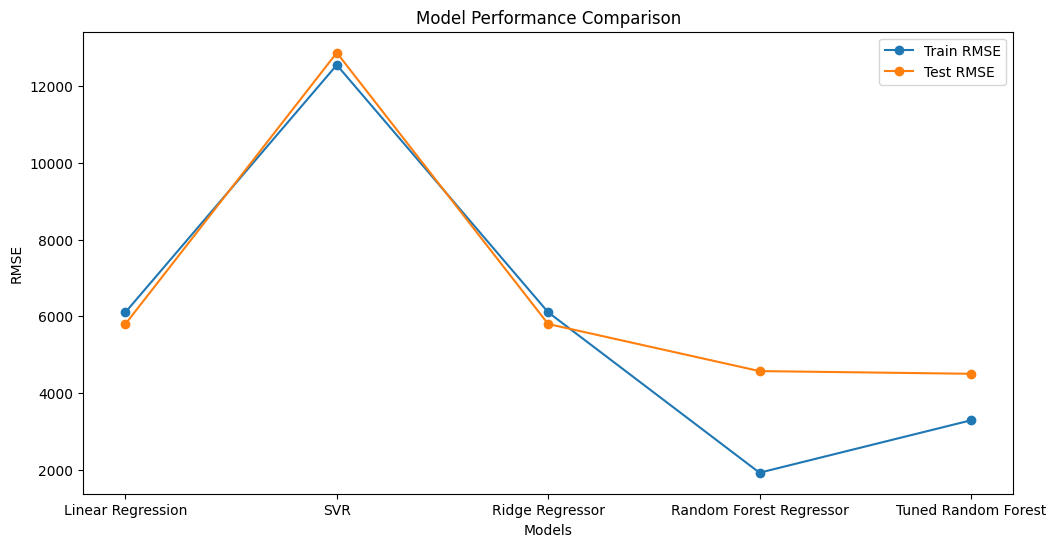

In [10]:
# Plotting performance comparison
models = ['Linear Regression', 'SVR', 'Ridge Regressor', 'Random Forest Regressor', 'Tuned Random Forest']
rmse_train = [mean_squared_error(y_train, lin_reg.predict(X_train_scaled), squared=False),
              mean_squared_error(y_train, svr.predict(X_train_scaled), squared=False),
              mean_squared_error(y_train, ridge.predict(X_train_scaled), squared=False),
              mean_squared_error(y_train, rf.predict(X_train_scaled), squared=False),
              mean_squared_error(y_train, best_rf.predict(X_train_scaled), squared=False)]

rmse_test = [mean_squared_error(y_test, lin_reg.predict(X_test_scaled), squared=False),
             mean_squared_error(y_test, svr.predict(X_test_scaled), squared=False),
             mean_squared_error(y_test, ridge.predict(X_test_scaled), squared=False),
             mean_squared_error(y_test, rf.predict(X_test_scaled), squared=False),
             mean_squared_error(y_test, best_rf.predict(X_test_scaled), squared=False)]

plt.figure(figsize=(12, 6))
plt.plot(models, rmse_train, marker='o', label='Train RMSE')
plt.plot(models, rmse_test, marker='o', label='Test RMSE')
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.legend()
plt.show()